In [1]:
# Loading necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas_profiling
import requests # might need to be installed
%matplotlib inline

In [2]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [3]:
# getting a data dictionary
response = requests.get('https://storage.googleapis.com/kaggle-competitions-data/kaggle/5407/205873/data_description.txt?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1564407075&Signature=Iduf4UDvx2Cei5S9B7A%2B%2Fz3u%2Ff8GG0RxvpfMu5IHRtJOFBsjq806B2sSr6zucZBwJeBNSOuIpOssfa4i%2BYS8ybrJgaHnA%2Fqkcox6ZsD8BLIl3yTHjwmfkie2ohGSI0bdZLiXblBWps8xJ8sGZPnmTegLYLhFgrA7O0BEF5dIXrFVYufTcndkOeOyYm3fopGjTablaxWOUyhmd43WfOxADJInaMqUk37SBzVD4jD1bj%2F%2B%2FJkK7OeTvUIBJOR3EXij97rhVqcZNdxTttF91t0W3HFcqJrRhrw5%2BKvZmHNzsT5AO164QSjlFqT5kU3dZWoZqxdDOxImVvr%2Fw2m4IRZGCw%3D%3D')
dict = response.text


In [4]:
# print(dict)

In [5]:
train.describe().T
test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


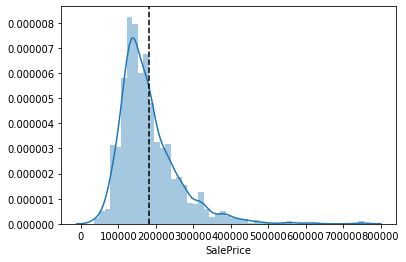

In [6]:
sns.distplot(train['SalePrice'])
plt.axvline(train['SalePrice'].mean(), color="k", linestyle="--")

In [7]:
# sns.pairplot(train, hue='SalePrice') # not a good idea

In [8]:
# pandas_profiling.ProfileReport(train)

### Dealing with missing values in obvious features

In [9]:
# Type of alley access to property
# print(train['Alley']).column_name()
# for c in train.columns:
#     print(train[c].value_counts())
#     print("Number of NaNs in the column {} is {}".format(c, train[c].isna().sum()))

train['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
train['Alley'].fillna('NA', inplace = True)
train['FireplaceQu'].fillna('NA', inplace = True)
train['GarageQual'].fillna('NA', inplace = True)
train['GarageFinish'].fillna('NA', inplace = True)
train['GarageCond'].fillna('NA', inplace = True)
train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
train['GarageType'].fillna('NA', inplace = True)
train['PoolQC'].fillna('NA', inplace = True)
train['Fence'].fillna('NA', inplace = True)
train['MiscFeature'].fillna('NA', inplace = True)
train['MasVnrType'].fillna('None', inplace = True)
train['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
train['BsmtQual'].fillna('NA', inplace = True)
train['BsmtCond'].fillna('NA', inplace = True)
train['BsmtExposure'].fillna('NA', inplace = True)
train['BsmtFinType1'].fillna('NA', inplace = True)
train['BsmtFinType2'].fillna('NA', inplace = True)
train['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

# and for the test set

test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
test['Alley'].fillna('NA', inplace = True)
test['FireplaceQu'].fillna('NA', inplace = True)
test['GarageQual'].fillna('NA', inplace = True)
test['GarageFinish'].fillna('NA', inplace = True)
test['GarageCond'].fillna('NA', inplace = True)
test['GarageYrBlt'].fillna(train['GarageYrBlt'].mean(), inplace = True)
test['GarageType'].fillna('NA', inplace = True)
test['PoolQC'].fillna('NA', inplace = True)
test['Fence'].fillna('NA', inplace = True)
test['MiscFeature'].fillna('NA', inplace = True)
test['MasVnrType'].fillna('None', inplace = True)
test['MasVnrArea'].fillna(train['MasVnrArea'].mean(), inplace = True)
test['BsmtQual'].fillna('NA', inplace = True)
test['BsmtCond'].fillna('NA', inplace = True)
test['BsmtExposure'].fillna('NA', inplace = True)
test['BsmtFinType1'].fillna('NA', inplace = True)
test['BsmtFinType2'].fillna('NA', inplace = True)
test['Electrical'].fillna('SBrkr', inplace = True) # substituting with the majority class

In [10]:
# Let's look a column name, and a number of NaNs
train.isna().sum()
#or 
train.columns[train.isna().any()].tolist()

[]

### Feature engineering part

#### Need to check cardinality in train and test sets and look at the outlies in columns to which it applies

In [13]:
for col in train.columns:
    if train[col].dtype == "object":
        print("For column {} cardinality in Train minus cardinality in Test equals: {}".format( ))

For column MSZoning cardinality in Train minus cardinality in Test equals: 0
For column Street cardinality in Train minus cardinality in Test equals: 0
For column Alley cardinality in Train minus cardinality in Test equals: 0
For column LotShape cardinality in Train minus cardinality in Test equals: 0
For column LandContour cardinality in Train minus cardinality in Test equals: 0
For column Utilities cardinality in Train minus cardinality in Test equals: 1
For column LotConfig cardinality in Train minus cardinality in Test equals: 0
For column LandSlope cardinality in Train minus cardinality in Test equals: 0
For column Neighborhood cardinality in Train minus cardinality in Test equals: 0
For column Condition1 cardinality in Train minus cardinality in Test equals: 0
For column Condition2 cardinality in Train minus cardinality in Test equals: 3
For column BldgType cardinality in Train minus cardinality in Test equals: 0
For column HouseStyle cardinality in Train minus cardinality in Tes

#### Exploring columns where cardinality in train and test sets isn't the same

In [14]:
# combining into one dataset in order to more conveniently compare unique values in these columns:
train_1 = train.copy()
train_1.drop(labels = 'SalePrice', axis = 1, inplace = True)
train_1['Status'] = 'Train Set'
test_1 = test.copy()
test_1['Status'] = 'Test Set'
combo = train_1.copy()
combo = combo.append(test_1)

In [23]:
# Gathering columns for which cardinality isn't the same into a list in order to make charts
cols_list = []
for col in train.columns:
     if train[col].dtype == "object" and (train[col].nunique()-test[col].nunique()) != 0:
        cols_list.append(col)
        
# cols_list1 = [cols_list1.append(train.col) for col in train.columns 
#               if (train[col].nunique()-test[col].nunique()) != 0]

# looking at values in these columns
for l in cols_list:
    sns.catplot(x=l, col='Status', kind='count', data=combo)
    plt.xticks(rotation=45)

In [ ]:
# need to address it and make them equal probably. One of the ways is to hot-encode the combined dataset
# We will do it in the modeling part. Also, just below, we will build boxplots of these features vs. SalePrice

In [ ]:
# Scatterplots: numeric columns vs. SalePrice in the train set 
# numeric columns
digit_cols = list(train.select_dtypes(include=[np.number]).columns.values)
digit_cols = digit_cols[2:] # don't need the first two columns
# scatter plots: digit_cols vs. SalePrice

for cols in digit_cols:
    plt.figure()
    sns.scatterplot(x = cols, y = 'SalePrice', data = train)
    
# LotFrontage, YearBuilt, TotalBsmtSF, 1stFlrSF, GarageArea seem to have linear relationships

In [45]:
# list w/ categorical variables
cater_cols = list(train.select_dtypes(exclude=[np.number]).columns.values)

In [ ]:
# categorical variables vs. SalePrice
for cols in cater_cols:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [64]:
train['MSSubClass'] = train['MSSubClass'].astype('category')

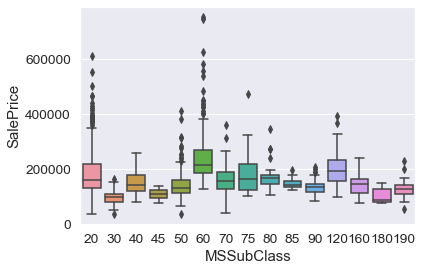

In [66]:
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = train)
# outliers: 60 2-STORY 1946 & NEWER; 20 1-STORY 1946 & NEWER ALL STYLES

In [ ]:
# Going back to columns with different cordinality cols_list
for cols in cols_list:
    plt.figure()
    sns.boxplot(x = cols, y = 'SalePrice', data = train)

In [73]:
#unloading charts from the memory because there are too many
plt.clf()
plt.close()

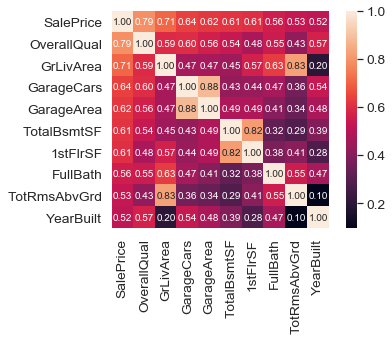

In [51]:
corrmat = train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# GrLivArea: Above grade (ground) living area square feet -- the strongest
#GarageCars and GarageArea is probably the same. Keeping only GarageCars because it's stronger
#TotalBsmtSF and 1stFlrSF are similar, keeping only TotalBsmntSF

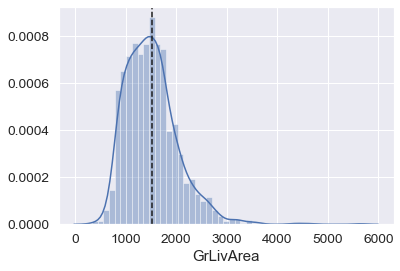

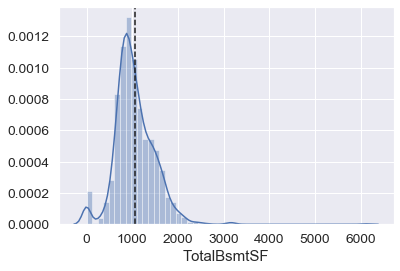

In [60]:
# Looking at these variables again
sns.distplot(train['GrLivArea'])
plt.axvline(train['GrLivArea'].mean(), color="k", linestyle="--")
plt.figure()
sns.distplot(train['TotalBsmtSF'])
plt.axvline(train['TotalBsmtSF'].mean(), color="k", linestyle="--")

#will need log transformation probably or some other normalization

In [ ]:
# plt.clf()
# plt.close()

In [74]:
# Engineering around the house age
#YearBuilt: Original construction date
#YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# Will add a new column: Remodeled Y/N. If YearRemodAdd = YearBuilt, then no, otherwise yes 
# Will add a new column: Age when sold. YrSold - YearRemodAdd 
combo['Remodeled Y/N'] = np.where(combo['YearRemodAdd'] ==combo['YearBuilt'], 'No', 'Yes')
combo['Age when Sold'] = combo['YrSold'] - combo['YearRemodAdd']

In [78]:
#and for the train set
train['Remodeled Y/N'] = np.where(train['YearRemodAdd'] ==train['YearBuilt'], 'No', 'Yes')
train['Age when Sold'] = train['YrSold'] - train['YearRemodAdd']

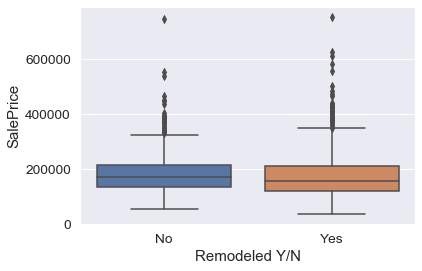

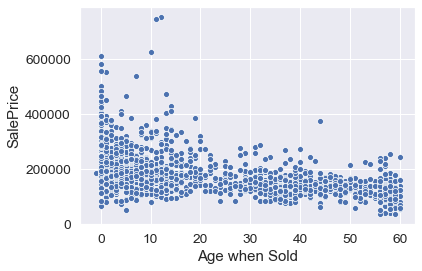

In [79]:
sns.boxplot(x ='Remodeled Y/N' , y = 'SalePrice', data = train)
plt.figure()
sns.scatterplot(x = 'Age when Sold', y = 'SalePrice', data = train)
# nothing crazy

In [81]:
#adding a new column totSqFt
#TotalBsmtSF + GrLivArea
train['totSqFt'] = train['TotalBsmtSF'] + train['GrLivArea']
combo['totSqFt'] = combo['TotalBsmtSF'] + combo['GrLivArea']

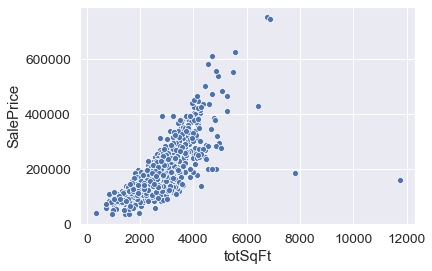

In [82]:
sns.scatterplot(x = 'totSqFt', y = 'SalePrice', data = train)
# a bit better than when they're one by one as below

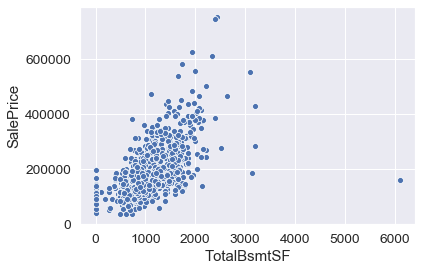

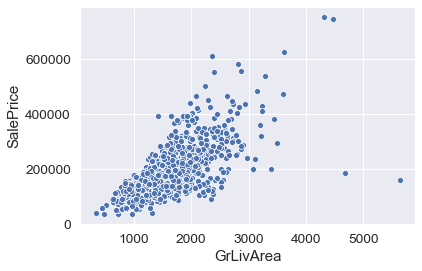

In [84]:
# one by one
sns.scatterplot(x = 'TotalBsmtSF', y = 'SalePrice', data = train)
plt.figure()
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice', data = train)

In [ ]:
# Remove correlated variables
# Remove houses that are very cheap and very expensive